In [1]:
import pandas as pd
import numpy as np
import gc; gc.enable()

In [2]:
usecols = [
    'item_id',
    'user_id',
    'region',
    'city',
    'parent_category_name',
    'category_name',
    'title',
    'description',
    'price',
    'item_seq_number',
    'activation_date']

In [3]:
def process_chunk(df):
    print('Original data shape', df.shape)
    df = df.loc[~df.activation_date.isnull(),:].reset_index(drop=True)
    df = df.loc[~df.user_id.isnull(),:].reset_index(drop=True)
    print('New data shape', df.shape)
    
    for c in ['item_id', 'region', 'city', 'parent_category_name', 'category_name', 'title', 'description']:
        df.loc[:, c] = df[c].fillna('unknown')
    
    for c in ['price', 'item_seq_number']:
        df.loc[:, c] = df[c].fillna(-1)
        
    for col in ['title', 'description']:
        df[col+'_len'] = df[col].apply(len)
        df[col+'_word_cnt'] = df[col].apply(lambda x: len(x.split()) if x != 'unknown' else 0)
        df[col+'_unique_word_cnt'] = df[col].apply(lambda x: len(set(x.split())) if x != 'unknown' else 0)
        df[col+'_unqiue_percent'] = df[col+'_unique_word_cnt'] / df[col+'_word_cnt'] * 100.
        
    df.drop(['title', 'description'], axis=1, inplace=True)
    return df

In [4]:
files = [
    'data/train.csv', 'data/test.csv', 'data/train_active.csv', 'data/test_active.csv'
]
all_df = None

for f in files:
    print('Processing file:', f)
    for chunk in pd.read_csv(f, usecols=usecols, chunksize=1000000):
        chunk = process_chunk(chunk)
        gc.collect()
        if all_df is None:
            all_df = chunk
        else:
            all_df = pd.concat([all_df, chunk]).reset_index(drop=True)
            del chunk; gc.collect()

Processing file: data/train.csv
Original data shape (1000000, 11)
New data shape (1000000, 11)
Original data shape (503424, 11)
New data shape (503424, 11)
Processing file: data/test.csv
Original data shape (508438, 11)
New data shape (508438, 11)
Processing file: data/train_active.csv
Original data shape (1000000, 11)
New data shape (991323, 11)
Original data shape (1000000, 11)
New data shape (991191, 11)
Original data shape (1000000, 11)
New data shape (991215, 11)
Original data shape (1000000, 11)
New data shape (991290, 11)
Original data shape (1000000, 11)
New data shape (990972, 11)
Original data shape (1000000, 11)
New data shape (991187, 11)
Original data shape (1000000, 11)
New data shape (991096, 11)
Original data shape (1000000, 11)
New data shape (991241, 11)
Original data shape (1000000, 11)
New data shape (991227, 11)
Original data shape (1000000, 11)
New data shape (991282, 11)
Original data shape (1000000, 11)
New data shape (991212, 11)
Original data shape (1000000, 1

KeyboardInterrupt: 

In [ ]:
all_df.shape

In [ ]:
all_df.isnull().sum()

In [ ]:
all_df.loc[:, 'title_unqiue_percent'] = all_df['title_unqiue_percent'].fillna(0.)
all_df.loc[:, 'description_unqiue_percent'] = all_df['description_unqiue_percent'].fillna(0.)

In [ ]:
all_df

In [ ]:
all_df.to_csv('data/merged_active.csv', index=False)

## Feature engineering

In [1]:
import pandas as pd
import numpy as np
import gc; gc.enable()

In [2]:
all_df = pd.read_csv('data/merged_active.csv')

KeyboardInterrupt: 

In [3]:
all_df = all_df.sort_values(['activation_date']).reset_index(drop=True)

In [4]:
all_df

,item_id,user_id,region,city,parent_category_name,category_name,price,item_seq_number,activation_date,title_len,title_word_cnt,title_unique_word_cnt,title_unqiue_percent,description_len,description_word_cnt,description_unique_word_cnt,description_unqiue_percent
0,b467a916365f,07ca3b07f063,Челябинская область,Челябинск,Личные вещи,"Одежда, обувь, аксессуары",100.0,36.0,2017-03-15,5,1,1,1.0,326,64,45,0.703125
1,c30d9fbe75c9,b22dfefbba3f,Свердловская область,Качканар,Транспорт,Автомобили,600000.0,5.0,2017-03-15,19,3,3,1.0,38,7,7,1.000000
2,ace44b746d95,199f5ce30be9,Челябинская область,Челябинск,Хобби и отдых,Велосипеды,1000.0,2.0,2017-03-15,16,2,2,1.0,362,43,41,0.953488
3,edcc4fa3480e,00ee75e70a20,Свердловская область,Первоуральск,Личные вещи,Детская одежда и обувь,1000.0,120.0,2017-03-15,12,2,2,1.0,190,19,19,1.000000
4,2df49feb5efa,81963bfa4dcf,Владимирская область,Владимир,Личные вещи,"Одежда, обувь, аксессуары",500.0,119.0,2017-03-15,14,2,2,1.0,71,10,10,1.000000
5,8ffa2d87c55a,883ba0d26d68,Ростовская область,Ростов-на-Дону,Личные вещи,Красота и здоровье,2000.0,133.0,2017-03-15,44,5,5,1.0,134,20,18,0.900000
6,ed8858045b1e,2daa4c664d99,Пермский край,Лобаново,Услуги,Предложение услуг,0.0,71.0,2017-03-15,40,6,6,1.0,167,20,19,0.950000
7,7ca4ac671556,7e1860fe0386,Самарская область,Самара,Личные вещи,Детская одежда и обувь,400.0,27.0,2017-03-15,21,2,2,1.0,35,5,5,1.000000
8,973a2f2871a1,71361bde2cf8,Краснодарский край,Сочи,Услуги,Предложение услуг,0.0,7.0,2017-03-15,16,2,2,1.0,195,23,21,0.913043
9,8828373eaee7,a709c483fe87,Саратовская область,Саратов,Хобби и отдых,Спорт и отдых,400.0,13.0,2017-03-15,22,4,4,1.0,46,7,7,1.000000


In [5]:
all_df.isnull().sum()

item_id                        0
user_id                        0
region                         0
city                           0
parent_category_name           0
category_name                  0
price                          0
item_seq_number                0
activation_date                0
title_len                      0
title_word_cnt                 0
title_unique_word_cnt          0
title_unqiue_percent           0
description_len                0
description_word_cnt           0
description_unique_word_cnt    0
description_unqiue_percent     0
dtype: int64

In [6]:
cols = [
    'price', 
    'title_len',
    'title_word_cnt',
    'title_unique_word_cnt',
    'title_unqiue_percent',
    'description_len',
    'description_word_cnt',
    'description_unique_word_cnt',
    'description_unqiue_percent',
]

In [7]:
vc = all_df.activation_date.value_counts()
vc

2017-03-15    12354623
2017-04-12    11897177
2017-03-16      312232
2017-04-13      305608
2017-03-20      277373
2017-03-19      273434
2017-03-17      270178
2017-04-17      266064
2017-04-14      259644
2017-03-21      259147
2017-03-22      256627
2017-03-18      249253
2017-03-27      243070
2017-03-23      238184
2017-03-26      236352
2017-03-24      215851
2017-04-15      210219
2017-03-25      209613
2017-04-16      198097
2017-03-28      112885
2017-04-18       81114
2017-03-29          87
2017-04-19          64
2017-03-30           3
2017-04-02           3
2017-04-01           3
2017-04-03           2
2017-04-20           1
2017-03-31           1
2017-04-07           1
Name: activation_date, dtype: int64

In [8]:
res = pd.DataFrame()
res['activation_date'] = list(vc.index)
res = res.sort_values('activation_date').reset_index(drop=True)

In [9]:
res['activation_date'] = res['activation_date'].astype(str)

In [10]:
for c in cols:
    selected_df = all_df[[c, 'activation_date']][all_df[c] >= 0]
    gp = selected_df.groupby(['activation_date'])[c]
    res.loc[:, c+'_mean'] = res['activation_date'].map(gp.mean())
    res.loc[:, c+'_med'] = res['activation_date'].map(gp.median())
    #res.loc[:, c+'_min'] = res['activation_date'].map(gp.min())
    #res.loc[:, c+'_max'] = res['activation_date'].map(gp.max())
    res.loc[:, c+'_std'] = res['activation_date'].map(gp.std())
    print(c+' processed')
    del selected_df, gp; gc.collect()

price processed
title_len processed
title_word_cnt processed
title_unique_word_cnt processed
title_unqiue_percent processed
description_len processed
description_word_cnt processed
description_unique_word_cnt processed
description_unqiue_percent processed


In [11]:
cols = [
    'item_id',
    'city',
    'region',
    'parent_category_name',
    'category_name'
]

In [12]:
for c in cols:
    selected_df = all_df[['activation_date', c]]
    gp = selected_df.groupby('activation_date')[c]
    map_type_count = gp.apply(lambda x: len(pd.Series(x).unique()))
    map_total_count = gp.apply(lambda x: len(x))
    
    #res.loc[:,'types_type_cnt_'+c]  = res['activation_date'].map(map_type_count)
    #res.loc[:,'types_total_cnt_'+c]  = res['activation_date'].map(map_total_count)
    res.loc[:,'avg_types_unique_percent_'+c] = res['activation_date'].map(map_type_count) \
                                                    / res['activation_date'].map(map_total_count) * 100.
    
    print(c+' processed')
    del selected_df, map_type_count, map_total_count, gp; gc.collect()

item_id processed
city processed
region processed
parent_category_name processed
category_name processed


In [13]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 200 
res

,activation_date,price_mean,price_med,price_std,title_len_mean,title_len_med,title_len_std,title_word_cnt_mean,title_word_cnt_med,title_word_cnt_std,title_unique_word_cnt_mean,title_unique_word_cnt_med,title_unique_word_cnt_std,title_unqiue_percent_mean,title_unqiue_percent_med,title_unqiue_percent_std,description_len_mean,description_len_med,description_len_std,description_word_cnt_mean,description_word_cnt_med,description_word_cnt_std,description_unique_word_cnt_mean,description_unique_word_cnt_med,description_unique_word_cnt_std,description_unqiue_percent_mean,description_unqiue_percent_med,description_unqiue_percent_std,avg_types_unique_percent_item_id,avg_types_unique_percent_city,avg_types_unique_percent_region,avg_types_unique_percent_parent_category_name,avg_types_unique_percent_category_name
0,2017-03-15,5.728315e+05,1000.0,3.300302e+08,23.195083,22,11.615978,3.574789,3.0,1.923919,3.567501,3.0,1.910750,0.998899,1.0,0.016008,229.781426,111.0,348.889736,32.272509,16,48.685249,27.856354,15.0,36.791728,0.911127,1.000000,0.197430,98.580831,0.014424,0.000227,0.000073,0.000380
1,2017-03-16,1.969807e+06,1327.5,9.089363e+08,22.440275,21,11.209286,3.500432,3.0,1.889123,3.494222,3.0,1.877518,0.999130,1.0,0.012049,211.549265,104.0,320.905707,29.670091,15,44.578198,25.899655,14.0,34.214159,0.903609,1.000000,0.219638,99.132056,0.463117,0.008968,0.002882,0.015053
2,2017-03-17,2.727837e+05,1400.0,2.576932e+06,22.404467,21,11.221985,3.501625,3.0,1.894542,3.495370,3.0,1.883198,0.999105,1.0,0.012466,210.027408,104.0,321.638414,29.489625,15,44.756162,25.757763,14.0,34.396767,0.903923,1.000000,0.219199,99.199417,0.530021,0.010364,0.003331,0.017396
3,2017-03-18,5.811851e+05,1200.0,1.825394e+08,21.666283,20,11.082776,3.358595,3.0,1.847844,3.352389,3.0,1.835254,0.999135,1.0,0.012327,188.317633,95.0,298.429769,26.488516,13,41.471718,23.354411,13.0,32.088002,0.901778,1.000000,0.231797,99.373729,0.562882,0.011234,0.003611,0.018856
4,2017-03-19,1.589698e+05,1100.0,2.009698e+06,21.320330,20,10.992152,3.293303,3.0,1.825088,3.287696,3.0,1.813648,0.999217,1.0,0.011641,171.078992,90.0,266.121218,24.152004,13,37.179120,21.488985,13.0,28.847034,0.900388,1.000000,0.239340,99.484336,0.529561,0.010240,0.003291,0.017189
5,2017-03-20,3.309732e+05,1500.0,1.563465e+07,22.105778,21,11.029878,3.457806,3.0,1.866520,3.451890,3.0,1.855178,0.999171,1.0,0.011780,200.815335,103.0,300.674997,28.158476,15,41.846012,24.748050,14.0,32.280351,0.899773,1.000000,0.230112,99.379175,0.523483,0.010095,0.003245,0.016945
6,2017-03-21,5.651030e+05,1500.0,1.224037e+08,22.190984,21,11.108124,3.472145,3.0,1.877361,3.466260,3.0,1.866474,0.999164,1.0,0.012041,205.445566,103.0,313.625422,28.783436,15,43.516576,25.202410,14.0,33.386858,0.901378,1.000000,0.226332,99.387606,0.556827,0.010805,0.003473,0.018136
7,2017-03-22,6.159371e+05,1500.0,1.600520e+08,22.100936,21,11.068478,3.465002,3.0,1.875459,3.459211,3.0,1.864460,0.999185,1.0,0.011796,201.364198,101.0,308.573948,28.239562,14,42.995284,24.744224,14.0,32.856234,0.899806,1.000000,0.230151,99.445888,0.553722,0.010911,0.003507,0.018315
8,2017-03-23,3.062415e+05,1500.0,4.329160e+06,22.168076,21,11.080459,3.477484,3.0,1.872028,3.471929,3.0,1.861609,0.999217,1.0,0.011484,207.221077,102.0,319.114382,29.006990,15,44.181728,25.387201,14.0,34.124636,0.897500,1.000000,0.232565,99.455043,0.589460,0.011756,0.003779,0.019733
9,2017-03-24,3.083785e+05,1500.0,5.761498e+06,22.206397,21,11.130324,3.483597,3.0,1.881740,3.477728,3.0,1.870480,0.999179,1.0,0.011728,208.282158,102.0,318.804849,29.205271,15,44.423730,25.528842,14.0,34.004710,0.897709,1.000000,0.231578,99.495949,0.636087,0.012972,0.004170,0.021774


In [14]:
res.isnull().sum()

activation_date                                  0
price_mean                                       1
price_med                                        1
price_std                                        3
title_len_mean                                   0
title_len_med                                    0
title_len_std                                    3
title_word_cnt_mean                              0
title_word_cnt_med                               0
title_word_cnt_std                               3
title_unique_word_cnt_mean                       0
title_unique_word_cnt_med                        0
title_unique_word_cnt_std                        3
title_unqiue_percent_mean                        0
title_unqiue_percent_med                         0
title_unqiue_percent_std                         3
description_len_mean                             0
description_len_med                              0
description_len_std                              3
description_word_cnt_mean      

In [15]:
for col in res.columns.tolist():
    if col == 'activation_date':
        continue
        
    print(res[col].isnull().sum(), res[col].mean())
    if res[col].isnull().sum() > 0:
        res[col] = res[col].fillna(res[col].mean())

1 329390.6201830066
1 9331.637931034482
3 68496327.68266672
0 21.412382829963153
0 20.366666666666667
3 10.408403328556972
0 3.3682269546208774
0 3.033333333333333
3 1.7309575317463952
0 3.363622278708885
0 3.033333333333333
3 1.7211350729714372
0 0.9993584841844586
0 1.0
3 0.009941605517548902
0 186.26009591757483
0 109.48333333333333
3 265.4975405340762
0 26.2782883446799
0 15.6
3 37.286498477125164
0 23.168886945816197
0 14.816666666666666
3 28.99083706418342
0 0.8632825813294083
0 0.9556610056610055
3 0.2244115564831789
0 99.59301423498775
0 23.915998521135542
0 21.854656891409658
0 20.6875634972525
0 22.919379595911643


In [16]:
res.isnull().sum()

activation_date                                  0
price_mean                                       0
price_med                                        0
price_std                                        0
title_len_mean                                   0
title_len_med                                    0
title_len_std                                    0
title_word_cnt_mean                              0
title_word_cnt_med                               0
title_word_cnt_std                               0
title_unique_word_cnt_mean                       0
title_unique_word_cnt_med                        0
title_unique_word_cnt_std                        0
title_unqiue_percent_mean                        0
title_unqiue_percent_med                         0
title_unqiue_percent_std                         0
description_len_mean                             0
description_len_med                              0
description_len_std                              0
description_word_cnt_mean      

In [17]:
del all_df; gc.collect()

0

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
for col in res.columns:
    if len(res[col].unique()) == 1:
        res.drop(col, axis=1, inplace=True)
        
res

,activation_date,price_mean,price_med,price_std,title_len_mean,title_len_med,title_len_std,title_word_cnt_mean,title_word_cnt_med,title_word_cnt_std,title_unique_word_cnt_mean,title_unique_word_cnt_med,title_unique_word_cnt_std,title_unqiue_percent_mean,title_unqiue_percent_std,description_len_mean,description_len_med,description_len_std,description_word_cnt_mean,description_word_cnt_med,description_word_cnt_std,description_unique_word_cnt_mean,description_unique_word_cnt_med,description_unique_word_cnt_std,description_unqiue_percent_mean,description_unqiue_percent_med,description_unqiue_percent_std,avg_types_unique_percent_item_id,avg_types_unique_percent_city,avg_types_unique_percent_region,avg_types_unique_percent_parent_category_name,avg_types_unique_percent_category_name
0,2017-03-15,5.728315e+05,1000.000000,3.300302e+08,23.195083,22,11.615978,3.574789,3.0,1.923919,3.567501,3.0,1.910750,0.998899,0.016008,229.781426,111.0,348.889736,32.272509,16,48.685249,27.856354,15.0,36.791728,0.911127,1.000000,0.197430,98.580831,0.014424,0.000227,0.000073,0.000380
1,2017-03-16,1.969807e+06,1327.500000,9.089363e+08,22.440275,21,11.209286,3.500432,3.0,1.889123,3.494222,3.0,1.877518,0.999130,0.012049,211.549265,104.0,320.905707,29.670091,15,44.578198,25.899655,14.0,34.214159,0.903609,1.000000,0.219638,99.132056,0.463117,0.008968,0.002882,0.015053
2,2017-03-17,2.727837e+05,1400.000000,2.576932e+06,22.404467,21,11.221985,3.501625,3.0,1.894542,3.495370,3.0,1.883198,0.999105,0.012466,210.027408,104.0,321.638414,29.489625,15,44.756162,25.757763,14.0,34.396767,0.903923,1.000000,0.219199,99.199417,0.530021,0.010364,0.003331,0.017396
3,2017-03-18,5.811851e+05,1200.000000,1.825394e+08,21.666283,20,11.082776,3.358595,3.0,1.847844,3.352389,3.0,1.835254,0.999135,0.012327,188.317633,95.0,298.429769,26.488516,13,41.471718,23.354411,13.0,32.088002,0.901778,1.000000,0.231797,99.373729,0.562882,0.011234,0.003611,0.018856
4,2017-03-19,1.589698e+05,1100.000000,2.009698e+06,21.320330,20,10.992152,3.293303,3.0,1.825088,3.287696,3.0,1.813648,0.999217,0.011641,171.078992,90.0,266.121218,24.152004,13,37.179120,21.488985,13.0,28.847034,0.900388,1.000000,0.239340,99.484336,0.529561,0.010240,0.003291,0.017189
5,2017-03-20,3.309732e+05,1500.000000,1.563465e+07,22.105778,21,11.029878,3.457806,3.0,1.866520,3.451890,3.0,1.855178,0.999171,0.011780,200.815335,103.0,300.674997,28.158476,15,41.846012,24.748050,14.0,32.280351,0.899773,1.000000,0.230112,99.379175,0.523483,0.010095,0.003245,0.016945
6,2017-03-21,5.651030e+05,1500.000000,1.224037e+08,22.190984,21,11.108124,3.472145,3.0,1.877361,3.466260,3.0,1.866474,0.999164,0.012041,205.445566,103.0,313.625422,28.783436,15,43.516576,25.202410,14.0,33.386858,0.901378,1.000000,0.226332,99.387606,0.556827,0.010805,0.003473,0.018136
7,2017-03-22,6.159371e+05,1500.000000,1.600520e+08,22.100936,21,11.068478,3.465002,3.0,1.875459,3.459211,3.0,1.864460,0.999185,0.011796,201.364198,101.0,308.573948,28.239562,14,42.995284,24.744224,14.0,32.856234,0.899806,1.000000,0.230151,99.445888,0.553722,0.010911,0.003507,0.018315
8,2017-03-23,3.062415e+05,1500.000000,4.329160e+06,22.168076,21,11.080459,3.477484,3.0,1.872028,3.471929,3.0,1.861609,0.999217,0.011484,207.221077,102.0,319.114382,29.006990,15,44.181728,25.387201,14.0,34.124636,0.897500,1.000000,0.232565,99.455043,0.589460,0.011756,0.003779,0.019733
9,2017-03-24,3.083785e+05,1500.000000,5.761498e+06,22.206397,21,11.130324,3.483597,3.0,1.881740,3.477728,3.0,1.870480,0.999179,0.011728,208.282158,102.0,318.804849,29.205271,15,44.423730,25.528842,14.0,34.004710,0.897709,1.000000,0.231578,99.495949,0.636087,0.012972,0.004170,0.021774


In [20]:
res.columns.tolist()

['activation_date',
 'price_mean',
 'price_med',
 'price_std',
 'title_len_mean',
 'title_len_med',
 'title_len_std',
 'title_word_cnt_mean',
 'title_word_cnt_med',
 'title_word_cnt_std',
 'title_unique_word_cnt_mean',
 'title_unique_word_cnt_med',
 'title_unique_word_cnt_std',
 'title_unqiue_percent_mean',
 'title_unqiue_percent_std',
 'description_len_mean',
 'description_len_med',
 'description_len_std',
 'description_word_cnt_mean',
 'description_word_cnt_med',
 'description_word_cnt_std',
 'description_unique_word_cnt_mean',
 'description_unique_word_cnt_med',
 'description_unique_word_cnt_std',
 'description_unqiue_percent_mean',
 'description_unqiue_percent_med',
 'description_unqiue_percent_std',
 'avg_types_unique_percent_item_id',
 'avg_types_unique_percent_city',
 'avg_types_unique_percent_region',
 'avg_types_unique_percent_parent_category_name',
 'avg_types_unique_percent_category_name']

## Seems all columns needs boxcox+normalize

In [21]:
boxcox_cols = ['price_mean', 'price_med', 'price_std',
 'title_len_mean', 'title_len_med', 'title_len_std',
 'title_word_cnt_mean', 'title_word_cnt_med', 'title_word_cnt_std',
 'title_unique_word_cnt_mean', 'title_unique_word_cnt_med', 'title_unique_word_cnt_std',
 'title_unqiue_percent_mean', 'title_unqiue_percent_std', 'description_len_mean',
 'description_len_med', 'description_len_std', 'description_word_cnt_mean',
 'description_word_cnt_med', 'description_word_cnt_std', 'description_unique_word_cnt_mean',
 'description_unique_word_cnt_med', 'description_unique_word_cnt_std', 'description_unqiue_percent_mean',
 'description_unqiue_percent_med', 'description_unqiue_percent_std', 'avg_types_unique_percent_item_id',
 'avg_types_unique_percent_city', 'avg_types_unique_percent_region', 'avg_types_unique_percent_parent_category_name',
 'avg_types_unique_percent_category_name']

In [22]:
from scipy.stats import boxcox

Column price_mean transformed with optimal lambda value=0.2994122418352048


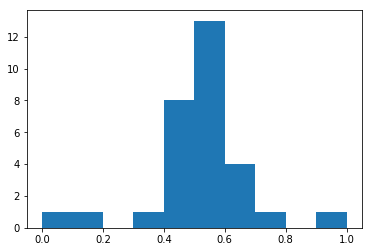

Column price_med transformed with optimal lambda value=0.14427805092522805


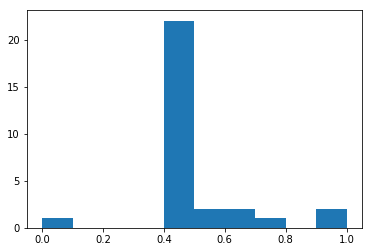

Column price_std transformed with optimal lambda value=0.12966492142911928


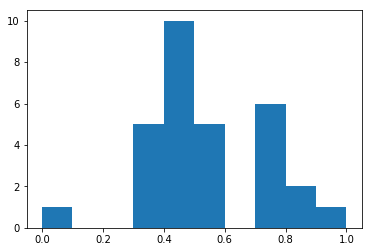

Column title_len_mean transformed with optimal lambda value=0.5451574994810433


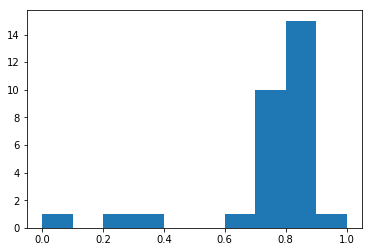

Column title_len_med transformed with optimal lambda value=0.5364765042499117


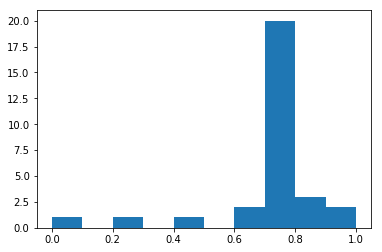

Column title_len_std transformed with optimal lambda value=0.677096404918583


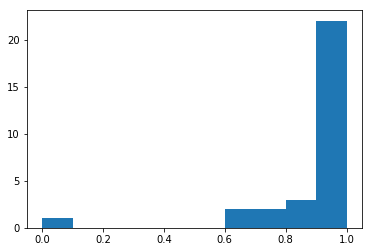

Column title_word_cnt_mean transformed with optimal lambda value=0.3700754026210801


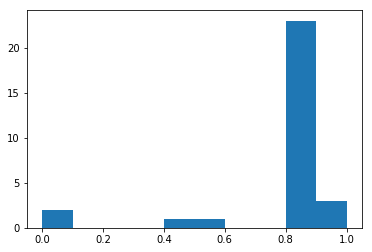

Column title_word_cnt_med transformed with optimal lambda value=0.37372900460858244


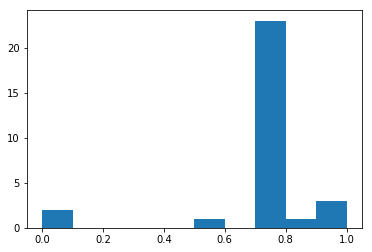

Column title_word_cnt_std transformed with optimal lambda value=0.5822188646224594


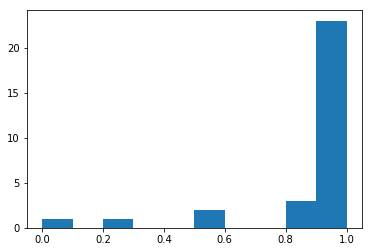

Column title_unique_word_cnt_mean transformed with optimal lambda value=0.3700549253645385


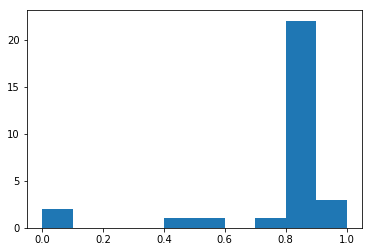

Column title_unique_word_cnt_med transformed with optimal lambda value=0.37372900460858244


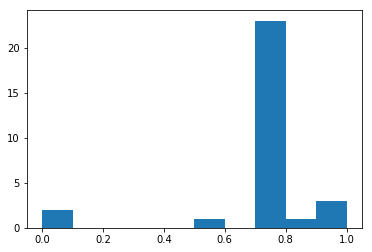

Column title_unique_word_cnt_std transformed with optimal lambda value=0.5834291092343042


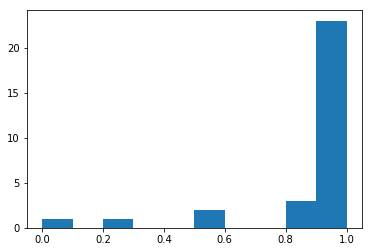

Column title_unqiue_percent_mean transformed with optimal lambda value=0.3528525652981312


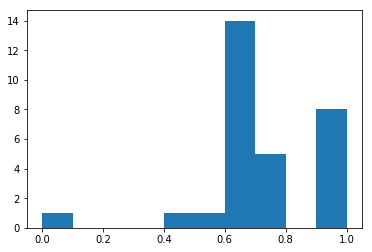

Column title_unqiue_percent_std transformed with optimal lambda value=0.17206386047430106


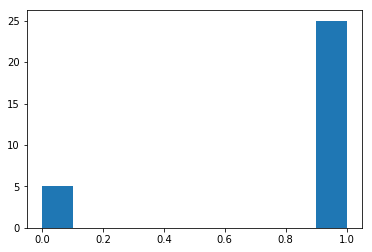

Column description_len_mean transformed with optimal lambda value=0.4514290836367399


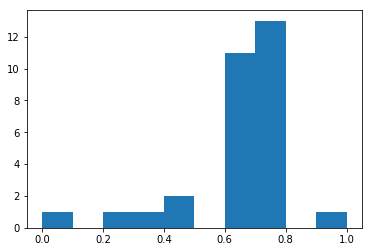

Column description_len_med transformed with optimal lambda value=0.36356795730876784


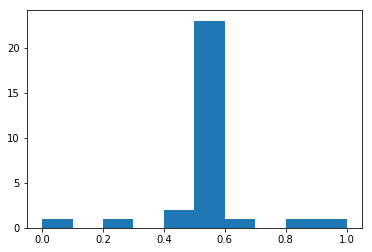

Column description_len_std transformed with optimal lambda value=0.5178465615847948


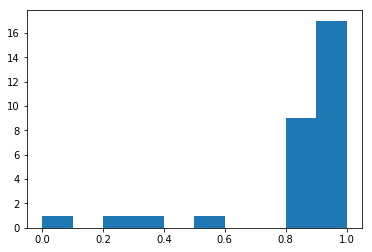

Column description_word_cnt_mean transformed with optimal lambda value=0.4562729770387568


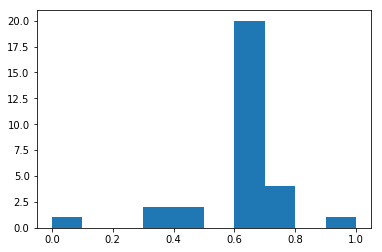

Column description_word_cnt_med transformed with optimal lambda value=0.3697206784608485


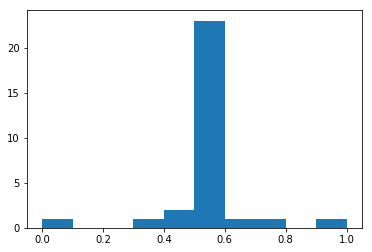

Column description_word_cnt_std transformed with optimal lambda value=0.5315621468813357


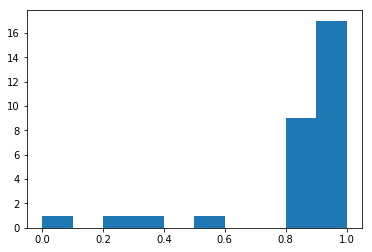

Column description_unique_word_cnt_mean transformed with optimal lambda value=0.4751253996146081


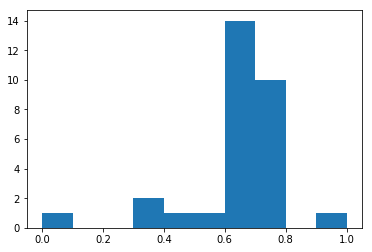

Column description_unique_word_cnt_med transformed with optimal lambda value=0.39393461077819025


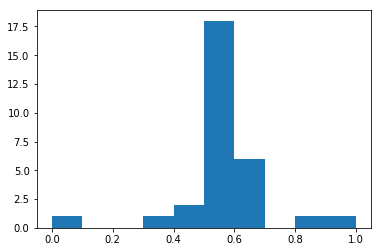

Column description_unique_word_cnt_std transformed with optimal lambda value=0.5530343162528033


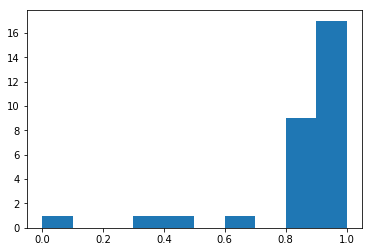

Column description_unqiue_percent_mean transformed with optimal lambda value=0.7772487130595152


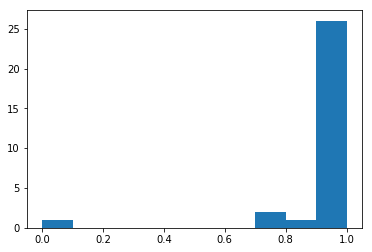

Column description_unqiue_percent_med transformed with optimal lambda value=0.8433815807101052


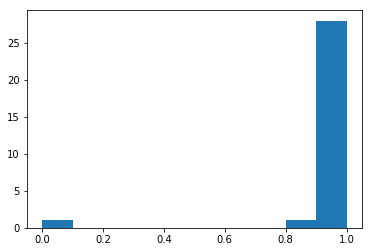

Column description_unqiue_percent_std transformed with optimal lambda value=0.34394903021476547


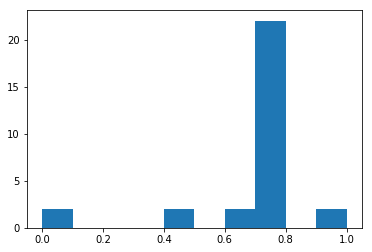

Column avg_types_unique_percent_item_id transformed with optimal lambda value=0.49083220558094404


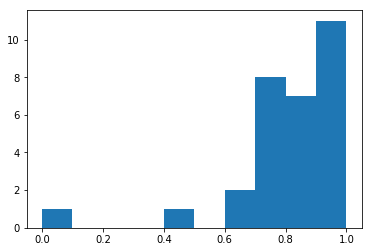

Column avg_types_unique_percent_city transformed with optimal lambda value=0.11797358649226956


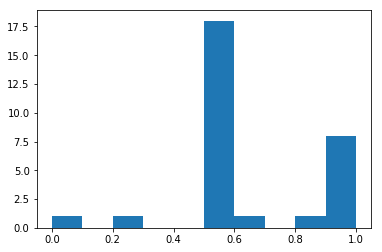

Column avg_types_unique_percent_region transformed with optimal lambda value=0.05686985193944999


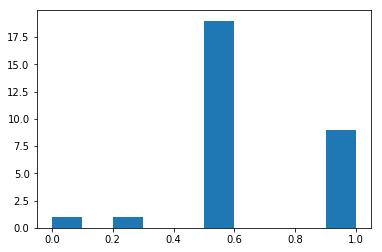

Column avg_types_unique_percent_parent_category_name transformed with optimal lambda value=0.04541798050180048


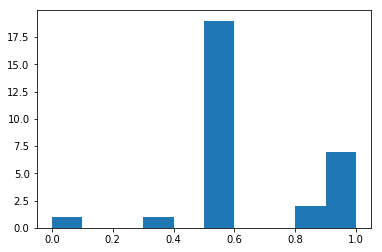

Column avg_types_unique_percent_category_name transformed with optimal lambda value=0.062455369319334875


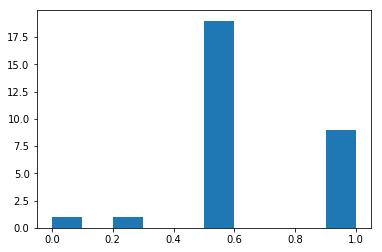

In [26]:
for c in boxcox_cols:
    res.loc[:, c] = (res[c]-res[c].min())/(res[c].max()-res[c].min())
    res.loc[:, c], ld = boxcox(res[c]+1e-15)
    res.loc[:, c] = (res[c]-res[c].min())/(res[c].max()-res[c].min())
    print('Column {} transformed with optimal lambda value={}'.format(c, ld))
    plt.hist(res[c])
    plt.show()

In [27]:
for c in boxcox_cols:
    print(res[c].max(), res[c].min())

1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0


In [28]:
res.to_csv('active_features.csv', index=False)